# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Work\Anaconda2\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


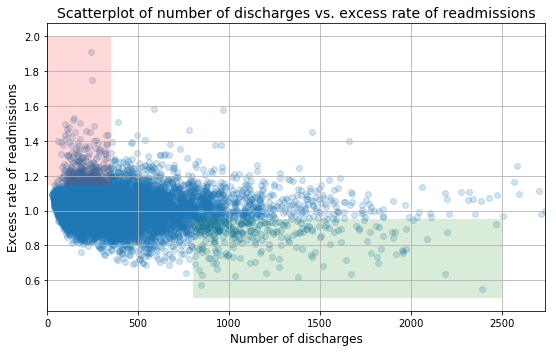

In [154]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

# Statistical analysis of the data

In [155]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [161]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [162]:
clean_hospital_read_df['Number of Discharges'].describe()

count    11578.000000
mean       362.909397
std        309.176945
min          0.000000
25%        157.000000
50%        280.000000
75%        472.750000
max       6793.000000
Name: Number of Discharges, dtype: float64

In [163]:
clean_hospital_read_df['Excess Readmission Ratio'].describe()

count    11497.000000
mean         1.007504
std          0.091964
min          0.549500
25%          0.952600
50%          1.003500
75%          1.058100
max          1.909500
Name: Excess Readmission Ratio, dtype: float64

Analyze the two groups mentioned in the preliminary discussion: hospitals with <100 capacity and thise with >1000 capacity: 

In [164]:
xlow= clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100].loc[:,'Excess Readmission Ratio']
xlow.mean()

1.0226183501683506

In [165]:
xlow.count()

1188

In [166]:
x2 = xlow[clean_hospital_read_df['Excess Readmission Ratio'] > 1].count()
x2

751

In [167]:
float(x2) / xlow.count()

0.6321548821548821

In [169]:
xhigh= clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000].loc[:,'Excess Readmission Ratio']
xhigh.mean(), xhigh.count()

(0.9783354211663071, 463)

In [170]:
xhigh[clean_hospital_read_df['Excess Readmission Ratio'] > 1].count()

206

In [171]:
206.0/463

0.4449244060475162

Comments A and B: 
The chart visually seems to have a slight decreasing trend as the number of discharges increases but it is by no means a decisive trend. 
The green and red shaded areas are chosen subjectively and only demonstrate the best-case and worst-case scenaios, and only apply to a small sample of the population.
The statistical analysis for (discarges < 100 and ratio > 1) and (discharges > 1000 and ratio > 1) are factually correct but only represent small sections of the population - 751 cases and 206 cases, respectively, from a population of 11,497 (approx. 8% of the total population).
The analysis provided excludes a large part of the population.

# Improved statistical analysis

A better statistical analysis would be to split the population in two groups at the median discharge rate (280) and test is there is a statistically significant difference between the two means. 

In [172]:
group1 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <= 280].loc[:,'Excess Readmission Ratio'].dropna()
group1.count()

5727

In [173]:
group2 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 280].loc[:,'Excess Readmission Ratio']
group2.count()

5770

In [174]:
g1m = group1.mean()
g1std = group1.std()
g1m, g1std

(1.0144066003142993, 0.08195887701719065)

In [175]:
g2m = group2.mean()
g2std = group2.std()
g2m, g2std

(1.0006524090121303, 0.10045814509976722)

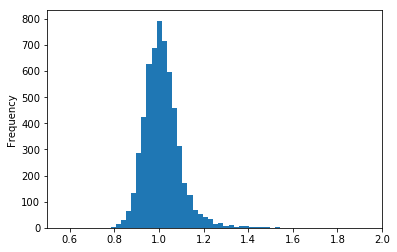

In [176]:
group1.plot(kind='hist', bins=50)
plt.axis(xmin = 0.5, xmax=2.0)
plt.show()

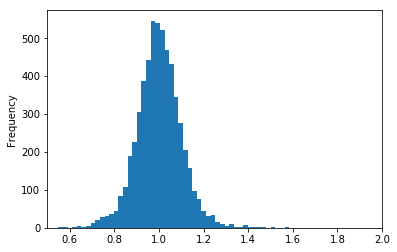

In [177]:
group2.plot(kind='hist', bins=50)
plt.axis(xmin = 0.5, xmax=2.0)
plt.show()

In [178]:
diff_means = g1m - g2m
diff_means

0.013754191302169039

In [179]:
diff_std = (g1std**2 / group1.count() + g2std**2 / group2.count())**0.5
diff_std

0.0017093651503518822

In [180]:
dist_from_mean = diff_means / diff_std
dist_from_mean

8.046373999924862

In [181]:
from scipy.stats import norm

In [182]:
p_value = (1 - norm.cdf(dist_from_mean)) * 2 
p_value

8.8817841970012523e-16

The p-value is far below our threshold of 1% and does indicate statistical significance. We can reject the null hypothesis and conclude that hospitals with larger capacity (i.e. higher number of discharges) do have lower excess readmission rates.

Test numerically:

In [183]:
def TestStatistic(data):
    group1, group2 = data
    test_stat = group1.mean() - group2.mean()
    return test_stat

In [184]:
n, m = len(group1), len(group2)
pool = np.hstack((group1, group2))

In [185]:
def RunModel():
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

In [186]:
test_stats = np.array([TestStatistic(RunModel()) for i in range(1000)])
test_stats.shape

(1000L,)

In [187]:
pvalue = float(sum(test_stats >= diff_means)) / len(test_stats)
pvalue

0.0

In [188]:
test_stats.max()

0.005429677186630677

In [189]:
test_stats.std()

0.0017116756828651557

In [190]:
diff_means / test_stats.std()

8.0355124746213864

In [299]:
# build a function to compare two means and return the p-value

def DiffTwoMeans(xs, ys):
    actual_diff_means = xs.mean() - ys.mean()
    n, m = len(xs), len(ys)
    diff_std = (xs.std()**2 / n + ys.std()**2 / m)**0.5
    dist_from_mean = actual_diff_means / diff_std
    p_value = (1 - norm.cdf(dist_from_mean)) * 2 
    return p_value

In [300]:
DiffTwoMeans(group1, group2) # checks that the function returns the correct value

8.8817841970012523e-16

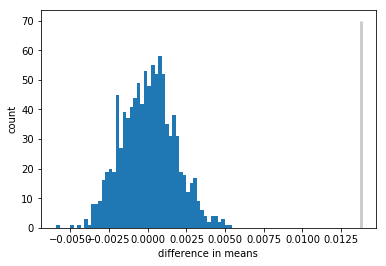

In [191]:
plt.vlines(diff_means, 0, 70, linewidth=3, color='0.8')
plt.hist(test_stats, bins = 50)
plt.xlabel('difference in means')
plt.ylabel('count')
None

Numerical test confirms the calculation that the observed difference in means is not reached in 1000 test runs.

# Correlation

Work out the correlation between x and y in the scatter plot, fit a linear regression line and determine the statistical significance of the fit.

In [261]:
# convert x and y to numpy arrays
a = np.asarray(x)
b = np.asarray(y)
a, b

(array([  25,   27,   28, ..., 2705, 2716, 2740]),
 array([ 1.0914,  1.0961,  1.0934, ...,  1.1148,  0.9804,  1.0003]))

In [262]:
np.corrcoef(a, b)

array([[ 1.        , -0.09309554],
       [-0.09309554,  1.        ]])

# Linear regression model

In [237]:
import scipy.stats

In [248]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(a, b)
print 'slope:', slope
print 'intercept:', intercept
print 'p_value:', p_value
print 'std_err:', std_err
print 'r-squared:', r_value**2

slope: -2.85650529438e-05
intercept: 1.01794755795
p_value: 1.50227564266e-23
std_err: 2.84982482785e-06
r-squared: 0.00866678010336


In [259]:
np.poly1d(np.polyfit(a, b, 1))  # this is a double-check using a different function, used in the scatter plot below

poly1d([ -2.85650529e-05,   1.01794756e+00])

In [263]:
def scatter_plot_with_correlation_line(x, y):
    '''
    http://stackoverflow.com/a/34571821/395857
    x does not have to be ordered.
    '''
    # Scatter plot
    plt.scatter(x, y, color='b')

    # Add correlation line
    axes = plt.gca()
    m, b = np.polyfit(x, y, 1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-', color='k')
    plt.show()


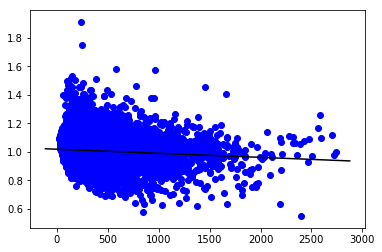

In [264]:
scatter_plot_with_correlation_line(a, b)

In [265]:
(1 - intercept) / slope  # point on x-axis where fit line reaches the value 1 on the y-axis

628.30473269972333

In [270]:
slope*1000

-0.028565052943822646

The regression line has a negative slope and the regression model p-value of far less than 1% points again to the conclusion that hospitals with higher capacity tend to have lower excess readmmission rates. 

The regression line dips below y-value of 1 at no. of discharges is above 628. The excess readmission rate improves by approx. 3% for a capacity increase of 1,000.

-----------------------------

# Split into 3 groups
- small hospitals with discharge number < 300
- medium-sized hospitals with discharge number from 300-999
- large hospitals with discharge number of 1000 and above

In [304]:
small_h = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 300].loc[:,'Excess Readmission Ratio'].dropna()
mid_h = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] >= 300) & (clean_hospital_read_df['Number of Discharges'] < 1000)].loc[:,'Excess Readmission Ratio'].dropna()
large_h = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >= 1000].loc[:,'Excess Readmission Ratio'].dropna()


Boxplot Visualization:

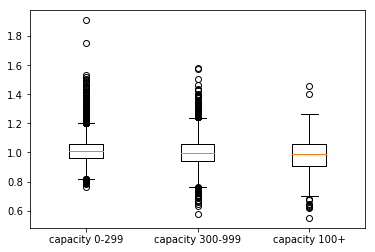

In [305]:
plt.boxplot([small_h, mid_h, large_h], labels=['capacity 0-299', 'capacity 300-999', 'capacity 100+'])
plt.show()

In [287]:
print 'capacity 0-299:', small_h.count()
print 'capacity 300-999:', mid_h.count()
print 'capacity 100+:', large_h.count()

capacity 0-299: 6108
capacity 300-999: 4925
capacity 100+: 464


In [295]:
grouped_h = pd.DataFrame({'Group': ['capacity 0-299', 'capacity 300-999', 'capacity 100+'], 
                          'No. of hospitals': [small_h.count(), mid_h.count(), large_h.count()],
                         'Share of total (%)': [small_h.count()/114.97, mid_h.count()/114.97, large_h.count()/114.97]})
grouped_h

,Group,No. of hospitals,Share of total (%)
0,capacity 0-299,6108,53.126903
1,capacity 300-999,4925,42.837262
2,capacity 100+,464,4.035835


In [303]:
alpha = 0.01
p_value_1 = DiffTwoMeans(small_h, mid_h)
p_value_2 = DiffTwoMeans(mid_h, large_h)
if ((p_value_1 < alpha) and (p_value_2 < alpha)): 
    print "Difference in means between all groups is statistically significant"

Difference in means between all groups is statistically significant


This test confirms that hospitals may be divided in 3 groups as above based on statistical significance of teh difference in means

# Conclusions

- Size matters: there is a statistically significant relationship between hospital capacity and excess readmission rate, showing that hospitals with higher capacity demonstrate lower excess readmission rates, with a p-value significantly below 1%.
- Hospitals with smaller capacity (< 300) represent the largest number of hospitals, at 53% of total. The large hospitals which do noticeably better in terms of excess readmissions, represent only 4% of hospitals. 
- A logical explanation would be that larger hospitals provide a superior level of care and have a broader range of spacializations in dealing with the conditions in question, leading to lower excess readmissions
- A fair calculation of the expected readmission rates (included the excess readmissions ratio calculation) must include hospital size as a factor. Currenly the expected readmission is based on "an average hospital with similar patients", hence not including hospital size as a factor. This policy is biased towards larger hospitals.
- A more effective policy recommendation would be to divide hospitals into groups by size (e.g. 3 groups as above) and set policy measures and performance targets for each group separately. In this way a hospital's performance is compared to its peer group and no group is treated unfairly  